# Ejercicios 7



#### 1. Carga de datos

[Movilens Dataset](http://grouplens.org/datasets/movielens/) recoge datos de 6000 usuarios y 4000  películas. Un total de 1.000.000 de entradas. La información se distribuye en 3 tablas.

- ratings.dat - El fichero recoge datos de valoraciones  de los usuarios
- movies.dat - Datos de las películas
- users.dat - Datos personales de los usuarios


Toda esta información se utiliza con mucha frecuencia en los sistemas de recomendación que aplican algoritmos de aprendizaje.



Pasos a seguir:

__Paso 1__. Descargar los siguientes ficheros de datos en el directorio de trabajo.

[users](./ml-1m/users.dat)

[movies](./ml-1m/movies.dat)

[ratings](./ml-1m/ratings.dat)

__Paso 2__. Crear un DataFrame para cada uno de los ficheros.  Usar la función head() para visualizar los primeros datos.

* Los dataframes han de llamarse: `usuarios`, `peliculas` y `valoraciones`.
* Con respecto a la carga del fichero ratings (tenéis la instrucción de carga más abajo): 
    * tiene un campo de tipo fecha expresado en segundos. 
    * Indica en la función __read_csv__ que vas a parsear esa columna como una fecha.
    * Utiliza la función __datetime.fromtimestamp__ para parsear las fechas.  Para ello tendrás que indicarlo en el parámetro __date_parser__ de la función __read_table__.

In [33]:
#paso1
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

usuarios= pd.read_csv('/Users/irenearabiourrutia/Downloads/users.dat.txt', 
               sep="::", names=['id_usuario','Sexo','3','4','5']
                               )
usuarios.head()



/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,id_usuario,Sexo,3,4,5
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [34]:
peliculas= pd.read_csv('/Users/irenearabiourrutia/Downloads/movies.dat', 
               sep="::", index_col = 1, names=["id_peli","genero"]
                               )
peliculas.head()


/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,id_peli,genero
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy


In [35]:

ruta_ratings = './ml-1m/ratings.dat'     # AQUÍ PONER LA RUTA DEL FICHERO


In [36]:
# Sol apartado 1:

from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

valoraciones = pd.read_csv('/Users/irenearabiourrutia/Downloads/ratings.dat.txt', sep = '::', header = None,
                         names = ['id_usuario', 'id_peli', 'puntuacion', 'Fecha'],
                         engine ='python',
                         parse_dates=[3], date_parser=dateparse)
                         

valoraciones.head()

,id_usuario,id_peli,puntuacion,Fecha
0,1,1193,5,2000-12-31 23:12:40
1,1,661,3,2000-12-31 23:35:09
2,1,914,3,2000-12-31 23:32:48
3,1,3408,4,2000-12-31 23:04:35
4,1,2355,5,2001-01-07 00:38:11


#### 2. Diagrama de Frecuencias

Los usuarios valoran las películas con valores del 1 al 5 donde el 1 es la peor puntuación y 5 es la mejor. La puntuación es una variable categórica. 
Representa mediante un diagrama de Frecuencias (tipo hist) la frecuencia de los votos de la película con título __X-Men (2000)__.

El gráfico que tienes que construir debe tener el siguiente aspecto:

![Diagrama](mi_diagrama.png)

__Notas:__

* El título de la película está en el dataframe __películas__.

In [40]:
peliculas.loc["X-Men (2000)"]

id_peli             3793
genero     Action|Sci-Fi
Name: X-Men (2000), dtype: object

In [41]:
xmen=valoraciones[valoraciones.id_peli == 3793]
xmen.head()

,id_usuario,id_peli,puntuacion,Fecha
276,5,3793,2,2000-12-31 07:12:50
527,7,3793,3,2000-12-31 04:52:17
700,9,3793,4,2000-12-31 02:19:41
1734,17,3793,4,2000-12-30 07:44:49
1950,18,3793,5,2000-12-30 06:12:26


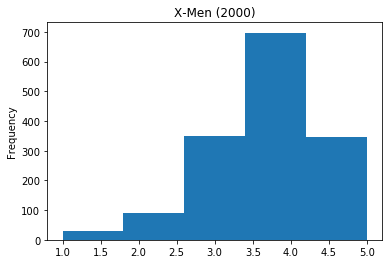

In [42]:
xmen['puntuacion'].plot(kind = 'hist', 
                        bins=5,
                       title = 'X-Men (2000)');

#### 3. Puntuación media

Calcula la puntuación media  de cada película por sexo del usuario. Diseña una función llamada __puntuacion_media__ que devuelve un Dataframe donde el índice es el título de la película y las columnaa son 'F' y 'M' (Female y Male respectivamente).

__Nota__:
Hay varias formas de hacerlo. Aquí os dejo alguna sugerencia:
* Necesitamos combinar las tres tablas ya que tenemos, por un lado las valoraciones, por otro el título de la película y por otro el sexo de los usuarios. La operación merge te permitirá realizar la  combinación
    * Combina primero las valoraciones con las peliculas por el campo 'id_peli'.
    * Combina el resultado anterior con los usuarios por el campo 'id_usuario'.
    
* Una vez combinadas las tres tablas en una sola tabla:
    * solución 1:  Agrupar por id_peli y por sexo del usuario. La función de agregación es la media mean(). Para obtener la tabla pedida utiliza `unstack` para deshacer el multi índice.
    * solución 2: Consulta la ayuda de la función __pivot_table__. Utiliza la función __pivot_table__. Esta no la hemos visto en la teoría, pero es muy interesante y útil. Merece la pena que intentéis resolverlo también utilizando esta opción.


In [43]:
peliculas2= pd.read_csv('/Users/irenearabiourrutia/Downloads/movies.dat', 
               sep="::", names=["id_peli","pelicula","genero"]
                               )
peliculas2.head()



/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,id_peli,pelicula,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
paso1=pd.merge(valoraciones,peliculas2,on=['id_peli'])
paso1.head()


,id_usuario,id_peli,puntuacion,Fecha,pelicula,genero
0,1,1193,5,2000-12-31 23:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,2000-12-31 22:33:33,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,2000-12-31 00:49:39,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,2000-12-30 19:01:19,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,2000-12-30 07:41:11,One Flew Over the Cuckoo's Nest (1975),Drama


In [45]:
paso2=pd.merge(usuarios,paso1,on=['id_usuario'])
paso2.head()

,id_usuario,Sexo,3,4,5,id_peli,puntuacion,Fecha,pelicula,genero
0,1,F,1,10,48067,1193,5,2000-12-31 23:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,2000-12-31 23:35:09,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,2000-12-31 23:32:48,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,2000-12-31 23:04:35,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,2001-01-07 00:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [46]:
paso3= paso2.drop(['id_usuario', '3','4','5','id_peli','Fecha','genero'], axis = 1)
paso3.head()


,Sexo,puntuacion,pelicula
0,F,5,One Flew Over the Cuckoo's Nest (1975)
1,F,3,James and the Giant Peach (1996)
2,F,3,My Fair Lady (1964)
3,F,4,Erin Brockovich (2000)
4,F,5,"Bug's Life, A (1998)"


In [47]:
paso4 = paso3.groupby(['pelicula','Sexo']).mean()
paso4.head()

puntuacion
pelicula                  Sexo            
$1,000,000 Duck (1971)    F       3.375000
                          M       2.761905
'Night Mother (1986)      F       3.388889
                          M       3.352941
'Til There Was You (1997) F       2.675676

In [48]:
puntuacion_media1 = paso4.unstack()
puntuacion_media1.head()

puntuacion          
Sexo                                   F         M
pelicula                                          
$1,000,000 Duck (1971)          3.375000  2.761905
'Night Mother (1986)            3.388889  3.352941
'Til There Was You (1997)       2.675676  2.733333
'burbs, The (1989)              2.793478  2.962085
...And Justice for All (1979)   3.828571  3.689024

In [49]:
#definiendo la función
def puntuacion_media(): 
    paso4=paso3.groupby(['pelicula','Sexo']).mean()
    paso5=paso4.unstack()
    return (paso5)

In [50]:
puntuacion_media()

puntuacion          
Sexo                                                    F         M
pelicula                                                           
$1,000,000 Duck (1971)                           3.375000  2.761905
'Night Mother (1986)                             3.388889  3.352941
'Til There Was You (1997)                        2.675676  2.733333
'burbs, The (1989)                               2.793478  2.962085
...And Justice for All (1979)                    3.828571  3.689024
1-900 (1994)                                     2.000000  3.000000
10 Things I Hate About You (1999)                3.646552  3.311966
101 Dalmatians (1961)                            3.791444  3.500000
101 Dalmatians (1996)                            3.240000  2.911215
12 Angry Men (1957)                              4.184397  4.328421
13th Warrior, The (1999)                         3.112000  3.168000
187 (1997)                                       2.428571  2.791667
2 Days in the Valley (1996)                      3.488889  3.244813
20 Dates (1998)                                  2.620690  2.918182
20,000 Leagues Under the Sea (1954)              3.670103  3.709205
200 Cigarettes (1999)                            3.169014  2.700000
2001: A Space Odyssey (1968)                     3.825581  4.129738
2010 (1984)                                      3.446809  3.413712
24 7: Twenty Four Seven (1997)                   5.000000  3.750000
24-hour Woman (1998)                             2.000000  1.600000
28 Days (2000)                                   3.209424  2.977707
3 Ninjas: High Noon On Mega Mountain (1998)      1.400000  1.351351
3 Strikes (2000)                                      NaN  2.750000
301, 302 (1995)                                  3.000000  2.857143
39 Steps, The (1935)                             3.965517  4.107692
400 Blows, The (Les Quatre cents coups) (1959)   4.489362  4.264286
42 Up (1998)                                     3.966667  4.362069
52 Pick-Up (1986)                                3.304348  3.299145
54 (1998)                                        2.701754  2.782178
7th Voyage of Sinbad, The (1958)                 3.409091  3.658879
...                                                   ...       ...
Wrongfully Accused (1998)                        2.666667  2.540541
Wyatt Earp (1994)                                3.147059  3.283898
X-Files: Fight the Future, The (1998)            3.489474  3.493797
X-Men (2000)                                     3.682310  3.851702
X: The Unknown (1956)                            2.250000  3.125000
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)     3.821429  3.536585
Yankee Zulu (1994)                               3.000000  3.000000
Yards, The (1999)                                2.687500  3.360656
Year My Voice Broke, The (1987)                  4.000000  3.705882
Year of Living Dangerously (1982)                3.951220  3.869403
Year of the Horse (1997)                              NaN  3.250000
Yellow Submarine (1968)                          3.714286  3.689286
Yojimbo (1961)                                   4.423077  4.402116
You Can't Take It With You (1938)                4.192308  3.921569
You So Crazy (1994)                              3.666667  2.300000
You've Got Mail (1998)                           3.542424  3.275591
Young Doctors in Love (1982)                     1.923077  2.742424
Young Frankenstein (1974)                        4.289963  4.239177
Young Guns (1988)                                3.371795  3.425620
Young Guns II (1990)                             2.934783  2.904025
Young Poisoner's Handbook, The (1995)            4.000000  3.532258
Young Sherlock Holmes (1985)                     3.514706  3.363344
Young and Innocent (1937)                        2.500000  3.500000
Your Friends and Neighbors (1998)                2.888889  3.536585
Zachariah (1971)                                      NaN  3.500000
Zed & Two Noughts, A (1985)        

#### 4. Mejor valoradas por mujeres

Ahora queremos conocer las películas mejor valoradas por las mujeres. Crea una función llamada __mejor_valoradas_mujeres__. Utiliza el dataFrame devuelto por la función __puntuacion_media__ del apartado anterior y devuelve un DataFrame ordenado de forma apropiada. 

__Nota__:

* Utiliza la función __sort_values__ para ordenar los resultados.

In [51]:
mejor_valoradas_mujeres= puntuacion_media1.sort_values(by = [('puntuacion','F')],ascending=False)
mejor_valoradas_mujeres.head()

puntuacion          
Sexo                                                       F         M
pelicula                                                              
Clean Slate (Coup de Torchon) (1981)                     5.0  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0  3.428571
Raw Deal (1948)                                          5.0  3.307692
Bittersweet Motel (2000)                                 5.0       NaN
Skipped Parts (2000)                                     5.0  4.000000

In [54]:
#Definiendo la función 
def mejor_valoradas_mujeres():
    paso6=puntuacion_media1.sort_values(by = [('puntuacion','F')],ascending=False)
    return (paso6)

In [55]:
mejor_valoradas_mujeres()

puntuacion          
Sexo                                                        F         M
pelicula                                                               
Clean Slate (Coup de Torchon) (1981)                 5.000000  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)    5.000000  3.428571
Raw Deal (1948)                                      5.000000  3.307692
Bittersweet Motel (2000)                             5.000000       NaN
Skipped Parts (2000)                                 5.000000  4.000000
Lamerica (1994)                                      5.000000  4.666667
Gambler, The (A J�t�kos) (1997)                      5.000000  3.166667
Brother, Can You Spare a Dime? (1975)                5.000000  3.642857
Ayn Rand: A Sense of Life (1997)                     5.000000  4.000000
24 7: Twenty Four Seven (1997)                       5.000000  3.750000
Twice Upon a Yesterday (1998)                        5.000000  3.222222
Woman of Paris, A (1923)                             5.000000  2.428571
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                  5.000000  4.750000
Gate of Heavenly Peace, The (1995)                   5.000000  5.000000
For the Moment (1994)                                5.000000  3.000000
Country Life (1994)                                  5.000000  2.000000
Prisoner of the Mountains (Kavkazsky Plennik) (...   5.000000  3.692308
Other Side of Sunday, The (S�ndagsengler) (1996)     5.000000  2.928571
Saltmen of Tibet, The (1997)                         5.000000  3.571429
Big Combo, The (1955)                                5.000000  3.600000
One Little Indian (1973)                             5.000000       NaN
Message to Love: The Isle of Wight Festival (1996)   5.000000  3.833333
Belly (1998)                                         5.000000  3.000000
Song of Freedom (1936)                               5.000000       NaN
Coldblooded (1995)                                   5.000000  3.588235
Battling Butler (1926)                               5.000000  3.222222
Dancemaker (1998)                                    5.000000  3.250000
World of Apu, The (Apur Sansar) (1959)               4.842105  4.189189
Hearts and Minds (1996)                              4.833333  4.000000
Apple, The (Sib) (1998)                              4.750000  4.600000
...                                                       ...       ...
Tinseltown (1998)                                         NaN  2.000000
Tokyo Fist (1995)                                         NaN  2.500000
Tough and Deadly (1995)                                   NaN  2.000000
Trans (1998)                                              NaN  3.000000
Trois (2000)                                              NaN  2.000000
Two Thousand Maniacs! (1964)                              NaN  3.266667
Ugly, The (1997)                                          NaN  1.888889
Ulysses (Ulisse) (1954)                                   NaN  5.000000
Underworld (1997)                                         NaN  1.000000
Uninvited Guest, An (2000)                                NaN  1.000000
Vampyros Lesbos (Las Vampiras) (1970)                     NaN  3.333333
Venice/Venice (1992)                                      NaN  1.000000
Very Natural Thing, A (1974)                              NaN  3.333333
Voyage to the Beginning of the World (1997)               NaN  4.000000
Waiting Game, The (2000)                                  NaN  2.000000
Walking Dead, The (1995)                                  NaN  2.684211
Waltzes from Vienna (1933)                                NaN  1.000000
War at Home, The (1996)                                   NaN  2.500000
Wend Kuuni (God's Gift) (1982)                            NaN  4.000000
Where's Marlowe? (1999)                                   NaN  4.000000
White Boys (1999)                                         NaN  1.000000
Wild Bill (1995)                                          NaN  3.146341
Windows (1980)     